In [1]:
import pandas as pd
import numpy as np


training = pd.read_csv("./training_data.csv", encoding='cp1252')

training.head()

,OBS_ID,KANAL,SHOW_ID,SHOW_DATUM,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,BESTELL_ID,...,WGH3_DESC,WGH4_DESC,DIVISION_DESC_SORT,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,BEWERTUNG,SOLD_OUT_FLG
0,235691,DIG,370117,30.07.2017 19:00:00,1,25802,1,12.0,1,399879,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"04 - 40 bis 49,99",NaN,SCHWARZ,NaN,7,NaN,1
1,235692,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,36,8,NaN,1
2,235693,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,38,23,NaN,1
3,235694,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,40,39,NaN,0
4,235695,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,42,44,NaN,0


In [2]:
test = pd.read_csv("./classification_data.csv", encoding='cp1252')


In [3]:
frames = [test, training]

result = pd.concat(frames)

In [4]:
# drop Columns we are sure that they are not needed

result.drop(['DIVISION_DESC_SORT','WGH4_DESC'],axis=1,inplace=True)

In [5]:
# convert FAKTOR into float
result["FAKTOR"] = result["FAKTOR"].str.replace(',', ".").astype(float)

In [6]:
# convert KANAL into category variable

result["KANAL"] = result["KANAL"].astype('category')
result["KANAL"] = result["KANAL"].cat.codes
result["KANAL"] = result["KANAL"].astype('category')

In [7]:
# fill NaN with zeros

result['BRAND_ID'].fillna(0,inplace=True)

In [8]:
# convert PREIS_DISCOUNT into float and fill NaN with zeros

result["PREIS_DISCOUNT"] = result["PREIS_DISCOUNT"].str.replace(',', ".").astype(float)
result['PREIS_DISCOUNT'] = result['PREIS_DISCOUNT'].fillna(0)

In [9]:
# convert BEWERTUNG into float and fill NaN with zeros

result.drop(['BEWERTUNG'],axis=1,inplace=True)

In [10]:
# fill NaN with zeros

result['MENGE_CALL'] = result['MENGE_CALL'].fillna(0)
result['MENGE_ECOM'] = result['MENGE_ECOM'].fillna(0)

In [11]:
# convert WG_DESC into category variable

result["WG_DESC"] = result["WG_DESC"].astype('category')
result["WG_DESC"] = result["WG_DESC"].cat.codes
result["WG_DESC"] = result["WG_DESC"].astype('category')

In [12]:
# convert WGH1_DESC into category variable

result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')
result["WGH1_DESC"] = result["WGH1_DESC"].cat.codes
result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')

In [13]:
# convert WGH3_DESC into category variable

result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')
result["WGH3_DESC"] = result["WGH3_DESC"].cat.codes
result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')

In [14]:
# Split PREISKLASSE_DESC and convert into Numeric

result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].str[:2]
result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].convert_objects(convert_numeric=True)

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [15]:
# convert PREIS_LABEL_DESC into category variable and fill NaN with zero

result['PREIS_LABEL_DESC'] = result['PREIS_LABEL_DESC'].fillna(0)

result["PREIS_LABEL_DESC"] = result["PREIS_LABEL_DESC"].astype('category')
result["PREIS_LABEL_DESC"] = result["PREIS_LABEL_DESC"].cat.codes
result["PREIS_LABEL_DESC"] = result["PREIS_LABEL_DESC"].astype('category')

In [16]:
# convert FARBE into category variable
result["FARBE"] = result["FARBE"].astype('category')
result["FARBE"] = result["FARBE"].cat.codes
result["FARBE"] = result["FARBE"].astype('category')

In [17]:
result['SHOW_DATUM']=pd.to_datetime(result['SHOW_DATUM'])
result['DAY_OF_WEEK'] = result['SHOW_DATUM'].dt.day_name()
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].cat.codes
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')

def from_hour_to_time_slot(x):
    if 7 <= x < 9:
        return "MORNING TIME"
    elif 9 <= x <17:
        return "DAYTIME"
    elif 17 <= x < 20:
        return "EARLY PRIME TIME"
    elif 20 <= x < 23:
        return "PRIME TIME"
    elif 1 <= x < 7:
        return "LATE NIGHT"
    else:
        return "LATE PRIME TIME"

result['Hour_of_the_day'] = result['SHOW_DATUM'].dt.hour
result.Hour_of_the_day = result.Hour_of_the_day.map(from_hour_to_time_slot)
result.Hour_of_the_day.unique()
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')
result["Hour_of_the_day"] = result["Hour_of_the_day"].cat.codes
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')

result.drop(['SHOW_DATUM'],axis=1,inplace=True)

In [18]:
# convert GROESSE into category variable, fill NaN with zero and merge certain data

result['GROESSE'] = result['GROESSE'].fillna(0)
result['GROESSE'].replace('ONESIZE','ONE SIZE',inplace=True)
result['GROESSE'].replace('A',0,inplace=True)
result['GROESSE'].replace('B',0,inplace=True)

result["GROESSE"] = result["GROESSE"].astype('category')
result["GROESSE"] = result["GROESSE"].cat.codes
result["GROESSE"] = result["GROESSE"].astype('category')

In [19]:
result.drop(['WGH4_ID'],axis=1,inplace=True)

In [20]:
result["NEW_ITEM_FLG"] = result["NEW_ITEM_FLG"].astype('category')
result["NEW_ITEM_FLG"] = result["NEW_ITEM_FLG"].cat.codes
result["NEW_ITEM_FLG"] = result["NEW_ITEM_FLG"].astype('category')

result["AIRING_23_FLG"] = result["AIRING_23_FLG"].astype('category')
result["AIRING_23_FLG"] = result["AIRING_23_FLG"].cat.codes
result["AIRING_23_FLG"] = result["AIRING_23_FLG"].astype('category')

result["ADT_FLG"] = result["ADT_FLG"].astype('category')
result["ADT_FLG"] = result["ADT_FLG"].cat.codes
result["ADT_FLG"] = result["ADT_FLG"].astype('category')

In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 0 to 6661
Data columns (total 34 columns):
OBS_ID                   7665 non-null int64
KANAL                    7665 non-null category
SHOW_ID                  7665 non-null int64
FAKTOR                   7665 non-null float64
WORDING_ID               7665 non-null int64
BRAND_FLG                7665 non-null int64
BRAND_ID                 7665 non-null float64
WDHL_FLG                 7665 non-null int64
BESTELL_ID               7665 non-null int64
ARTIKEL_ID               7665 non-null int64
SHOW_POSITION            7665 non-null int64
NEW_ITEM_FLG             7665 non-null category
AIRING_23_FLG            7665 non-null category
AIRING_456_FLG           7665 non-null int64
ADT_FLG                  7665 non-null category
WG_ID                    7665 non-null int64
WGH1_ID                  7665 non-null int64
WGH3_ID                  7665 non-null int64
PREIS_DISCOUNT           7665 non-null float64
ANZ_ARTIKEL_ID      

In [22]:
cols = result.columns.tolist()

cols

['OBS_ID',
 'KANAL',
 'SHOW_ID',
 'FAKTOR',
 'WORDING_ID',
 'BRAND_FLG',
 'BRAND_ID',
 'WDHL_FLG',
 'BESTELL_ID',
 'ARTIKEL_ID',
 'SHOW_POSITION',
 'NEW_ITEM_FLG',
 'AIRING_23_FLG',
 'AIRING_456_FLG',
 'ADT_FLG',
 'WG_ID',
 'WGH1_ID',
 'WGH3_ID',
 'PREIS_DISCOUNT',
 'ANZ_ARTIKEL_ID',
 'ONAIR_SEKUNDEN',
 'MENGE_CALL',
 'MENGE_ECOM',
 'WG_DESC',
 'WGH1_DESC',
 'WGH3_DESC',
 'PREISKLASSE_DESC',
 'PREIS_LABEL_DESC',
 'FARBE',
 'GROESSE',
 'MENGE_FREI_SHOWBEGINN',
 'SOLD_OUT_FLG',
 'DAY_OF_WEEK',
 'Hour_of_the_day']

In [23]:
result = result[['OBS_ID', 'DAY_OF_WEEK',
 'Hour_of_the_day',
 'KANAL',
 'SHOW_ID',
 'FAKTOR',
 'WORDING_ID',
 'BRAND_FLG',
 'BRAND_ID',
 'WDHL_FLG',
 'BESTELL_ID',
 'ARTIKEL_ID',
 'SHOW_POSITION',
 'NEW_ITEM_FLG',
 'AIRING_23_FLG',
 'AIRING_456_FLG',
 'ADT_FLG',
 'WG_ID',
 'WGH1_ID',
 'WGH3_ID',
 'PREIS_DISCOUNT',
 'ANZ_ARTIKEL_ID',
 'ONAIR_SEKUNDEN',
 'MENGE_CALL',
 'MENGE_ECOM',
 'WG_DESC',
 'WGH1_DESC',
 'WGH3_DESC',
 'PREISKLASSE_DESC',
 'PREIS_LABEL_DESC',
 'FARBE',
 'GROESSE',
 'MENGE_FREI_SHOWBEGINN',
 'SOLD_OUT_FLG']]

In [24]:
result.head()

,OBS_ID,DAY_OF_WEEK,Hour_of_the_day,KANAL,SHOW_ID,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,...,MENGE_ECOM,WG_DESC,WGH1_DESC,WGH3_DESC,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,SOLD_OUT_FLG
0,1,2,0,1,372896,1.0,34013,0,0.0,0,...,0.0,19,11,1,5,0,86,22,12,NaN
1,2,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,35,6,1,6,0,86,34,59,NaN
2,3,0,3,0,371999,1.3,25637,1,12.0,0,...,7.0,35,6,1,6,0,54,32,74,NaN
3,4,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,36,9,1,8,0,86,36,51,NaN
4,5,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,36,9,1,8,0,98,24,15,NaN


In [128]:
# K-Means Algorithm for size and color

X = result[["GROESSE","FARBE"]]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)

In [129]:
# Elbow Method to check the optimal number of clusters

from sklearn.cluster import KMeans

scores=[]
for n in range (2,12):
    model = KMeans(n_clusters=n)
    model.fit(X_transformed)
    scores.append(model.inertia_)

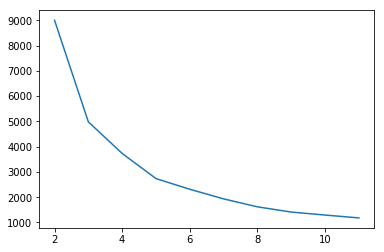

In [130]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.plot(range(2,12),scores)
plt.show()

# auf y-Achse mittlerer quadrierter Abstand 
# auf x-Achse Anzahl der Cluster

# beobachten wie sich die Datenbeschreibung verbessert (Unterschiede zwischen den einzelnen Clustern)

In [131]:
# as seen in the graph above a n_cluster of 7 gives a balanced prediction, therefore this number is 
# to minimize the difference between datapoints and K-Mean

model = KMeans(n_clusters=7)
model.fit(X_transformed)
model.fit(X_transformed)

labels = model.labels_ # Aufteilung der Daten
centers=model.cluster_centers_
centers_transformed=scaler.inverse_transform(centers)

print(model.labels_)

[1 4 6 ... 4 4 4]


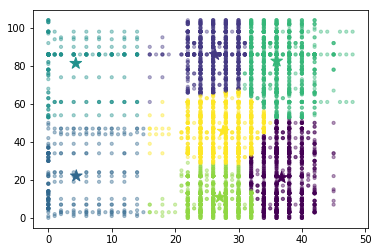

In [132]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.scatter(result["GROESSE"],result["FARBE"],c=labels,alpha=0.4,s=10)
plt.scatter(centers_transformed[:,0],
            centers_transformed[:,1],
            c=range(len(centers_transformed)),
            marker="*",
            s=150)
plt.show()

In [25]:
# split dataset again into training and test data

test = result[result["OBS_ID"]<=1003].copy()
training = result[result["OBS_ID"]> 1003].copy()

In [26]:
test.head()

,OBS_ID,DAY_OF_WEEK,Hour_of_the_day,KANAL,SHOW_ID,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,...,MENGE_ECOM,WG_DESC,WGH1_DESC,WGH3_DESC,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,SOLD_OUT_FLG
0,1,2,0,1,372896,1.0,34013,0,0.0,0,...,0.0,19,11,1,5,0,86,22,12,NaN
1,2,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,35,6,1,6,0,86,34,59,NaN
2,3,0,3,0,371999,1.3,25637,1,12.0,0,...,7.0,35,6,1,6,0,54,32,74,NaN
3,4,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,36,9,1,8,0,86,36,51,NaN
4,5,0,3,0,371999,1.3,25637,1,12.0,0,...,0.0,36,9,1,8,0,98,24,15,NaN


In [138]:
# K-Means Algorithm for color and Sold_Out_FLG

X = training[["SOLD_OUT_FLG","FARBE"]]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)

In [139]:
# Elbow Method to check the optimal number of clusters

from sklearn.cluster import KMeans

scores=[]
for n in range (2,12):
    model = KMeans(n_clusters=n)
    model.fit(X_transformed)
    scores.append(model.inertia_)

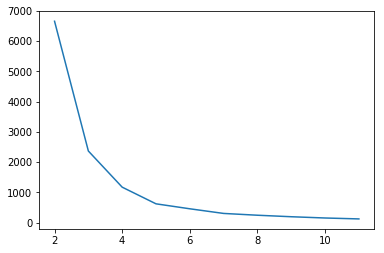

In [140]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.plot(range(2,12),scores)
plt.show()

# auf y-Achse mittlerer quadrierter Abstand 
# auf x-Achse Anzahl der Cluster

# beobachten wie sich die Datenbeschreibung verbessert (Unterschiede zwischen den einzelnen Clustern)

In [143]:
# as seen in the graph above a n_cluster of 7 gives a balanced prediction, therefore this number is 
# to minimize the difference between datapoints and K-Mean

model = KMeans(n_clusters=4)
model.fit(X_transformed)
model.fit(X_transformed)

labels = model.labels_ # Aufteilung der Daten
centers=model.cluster_centers_
centers_transformed=scaler.inverse_transform(centers)

print(model.labels_)

[1 1 1 ... 2 2 2]


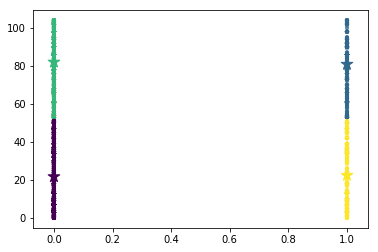

In [144]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.scatter(training["SOLD_OUT_FLG"],training["FARBE"],c=labels,alpha=0.4,s=10)
plt.scatter(centers_transformed[:,0],
            centers_transformed[:,1],
            c=range(len(centers_transformed)),
            marker="*",
            s=150)
plt.show()

In [27]:
correlations_data = training.corr()['SOLD_OUT_FLG'].sort_values()
print(correlations_data)

MENGE_FREI_SHOWBEGINN   -0.217899
WGH3_ID                 -0.058962
WGH1_ID                 -0.058691
WG_ID                   -0.058691
ANZ_ARTIKEL_ID          -0.041373
ARTIKEL_ID              -0.037294
BESTELL_ID              -0.037294
SHOW_POSITION           -0.035583
AIRING_456_FLG          -0.024877
BRAND_ID                -0.009940
WDHL_FLG                -0.006712
WORDING_ID               0.003995
BRAND_FLG                0.004250
PREISKLASSE_DESC         0.007891
PREIS_DISCOUNT           0.011551
FAKTOR                   0.016922
SHOW_ID                  0.019681
MENGE_ECOM               0.020832
OBS_ID                   0.032785
MENGE_CALL               0.143767
ONAIR_SEKUNDEN           0.176051
SOLD_OUT_FLG             1.000000
Name: SOLD_OUT_FLG, dtype: float64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = training.corr()
print(corr)

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches


sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax)

                         OBS_ID   SHOW_ID    FAKTOR  WORDING_ID  BRAND_FLG  \
OBS_ID                 1.000000  0.907461 -0.062878    0.133050  -0.058408   
SHOW_ID                0.907461  1.000000 -0.023201    0.165589  -0.027156   
FAKTOR                -0.062878 -0.023201  1.000000   -0.025590   0.171271   
WORDING_ID             0.133050  0.165589 -0.025590    1.000000  -0.220763   
BRAND_FLG             -0.058408 -0.027156  0.171271   -0.220763   1.000000   
BRAND_ID              -0.062440 -0.048710  0.104711   -0.228983   0.895978   
WDHL_FLG               0.044652  0.063678 -0.134173    0.006885  -0.023172   
BESTELL_ID             0.699787  0.795014  0.053076    0.173337   0.003009   
ARTIKEL_ID             0.699787  0.795014  0.053076    0.173337   0.003009   
SHOW_POSITION         -0.005867  0.016536 -0.015779   -0.027375   0.019241   
AIRING_456_FLG         0.036390 -0.031559 -0.057908   -0.054289   0.089651   
WG_ID                  0.032007 -0.019894 -0.194867    0.057354 

In [29]:
x = training

In [30]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df

In [31]:
training = corr_df(training, 0.6)

BESTELL_ID | OBS_ID | 0.7
BESTELL_ID | SHOW_ID | 0.8
ARTIKEL_ID | OBS_ID | 0.7
ARTIKEL_ID | SHOW_ID | 0.8
WGH3_ID | WG_ID | 1.0


In [32]:
training.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)
test.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)

In [33]:
features = training[["PREIS_DISCOUNT","KANAL","FAKTOR","NEW_ITEM_FLG","MENGE_ECOM",
               "MENGE_CALL","WGH3_DESC","Hour_of_the_day","DAY_OF_WEEK",
             "AIRING_23_FLG","ADT_FLG","ONAIR_SEKUNDEN","MENGE_FREI_SHOWBEGINN"]]
target = training[["SOLD_OUT_FLG"]].astype('category')

In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6662 entries, 0 to 6661
Data columns (total 13 columns):
PREIS_DISCOUNT           6662 non-null float64
KANAL                    6662 non-null category
FAKTOR                   6662 non-null float64
NEW_ITEM_FLG             6662 non-null category
MENGE_ECOM               6662 non-null float64
MENGE_CALL               6662 non-null float64
WGH3_DESC                6662 non-null category
Hour_of_the_day          6662 non-null category
DAY_OF_WEEK              6662 non-null category
AIRING_23_FLG            6662 non-null category
ADT_FLG                  6662 non-null category
ONAIR_SEKUNDEN           6662 non-null int64
MENGE_FREI_SHOWBEGINN    6662 non-null int64
dtypes: category(7), float64(4), int64(2)
memory usage: 410.9 KB


In [35]:
predict = test[["PREIS_DISCOUNT","KANAL","FAKTOR","NEW_ITEM_FLG","MENGE_ECOM",
               "MENGE_CALL","WGH3_DESC","Hour_of_the_day","DAY_OF_WEEK",
             "AIRING_23_FLG","ADT_FLG","ONAIR_SEKUNDEN","MENGE_FREI_SHOWBEGINN"]]

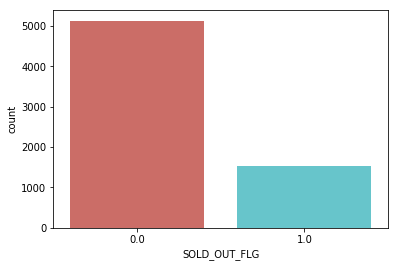

In [36]:
sns.countplot(x="SOLD_OUT_FLG",data=training,palette="hls")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
# Fit on the training data
scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)
predict = scaler.transform(predict)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(5329, 13)
(1333, 13)
(5329, 1)
(1333, 1)


In [38]:
# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 7.03, solver='liblinear')

LR.fit(X, y)

print(LR.score(X_test, y_test))
# print(model.score(X_training, y_training)) 
# shows how many percent of the dataset was predicted correctly

y_pred = LR.predict(X_test)

from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.9114778694673669


/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7547714285231538

In [88]:
# Hyperparametertuning for LogisticRegression-Algorithm with GridSearchCV

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression())
])

In [89]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "lr__C": [0.001, 0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.5, 2, 3, 4, 5, 6, 7, 7.01,7.02,7.03,7.05,7.1,7.15, 7.2,7.3,7.5,7.8,8,8.2, 9, 10],
})
clf.fit(X, y)

print(clf.best_params_)

print(clf.score(X_test, y_test))

{'lr__C': 7}
0.9114778694673669


In [43]:
y_predictionLR = LR.predict(predict)

print(y_predictionLR)

prediction = y_predictionLR
final_prediction = prediction.astype(int)
print(final_prediction)

SOLD_OUT_FLG = pd.DataFrame(data=final_prediction,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pred_final.to_csv('sold_out_predict_final.csv',index=False)



print(sum(y_predictionLR))

[1. 0. 0. ... 1. 0. 1.]
[1 0 0 ... 1 0 1]
247.0


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


scores = cross_val_score(LogisticRegression(), X, y.values.ravel(), cv = RepeatedKFold(n_repeats = 10, random_state = 42))

print(scores)
print(np.mean(scores))

# genauere/ stabilere Ergebnisse (geringere Varianz)

[0.91275797 0.91932458 0.89493433 0.92401501 0.91455399 0.91275797
 0.91932458 0.91275797 0.91744841 0.91267606 0.91651032 0.91838649
 0.90994371 0.91557223 0.91361502 0.91838649 0.90900563 0.90994371
 0.91275797 0.92018779 0.92307692 0.91463415 0.90525328 0.90994371
 0.92018779 0.91838649 0.91275797 0.90150094 0.93058161 0.91267606
 0.91557223 0.91932458 0.90056285 0.91557223 0.9286385  0.92213884
 0.9043152  0.93245779 0.90150094 0.91455399 0.90337711 0.90243902
 0.92870544 0.91744841 0.91737089 0.91744841 0.92213884 0.91651032
 0.90994371 0.91455399]
0.914768649419972


In [45]:
# Format von confusion_matrix:
# Modell: Nicht wahr                Modell: Wahr

# Realität: Nicht wahr              Richtig negativ
# Realität: Wahr                    Falsch negativ


In [46]:
y_test_pred = LR.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[962,  74],
       [ 44, 253]])

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_proba = LR.predict_proba(X_test)[:, 1] # alle Zeilen, nur zweite Spalte!!
# contains probabilities, probability that 1 is predicted

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# false positive rate, true positive rate and threshold

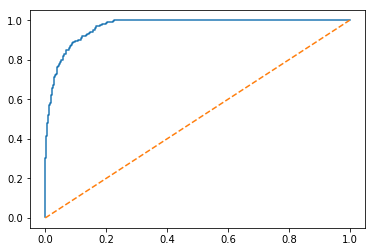

In [117]:
%matplotlib inline

import matplotlib.pyplot as plt



plt.plot(fpr, tpr)
plt.plot(([0, 1]), linestyle = '--')
plt.show()

In [49]:
roc_auc_score(y_test, y_test_proba)

0.9682409682409682

In [50]:
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle


X, y = shuffle(X, y.values.ravel())

train_sizes_abs, train_scores, test_scores = learning_curve(LogisticRegression(), X, y)

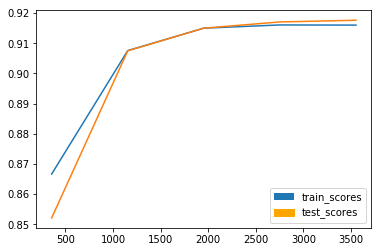

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1))
plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1))


red_patch = mpatches.Patch(label='train_scores')
blue_path = mpatches.Patch(color = 'orange', label='test_scores')
plt.legend(handles=[red_patch, blue_path])
plt.show()


# ganz rechts: underfitting, sehr starke Generalisierung (auch mehr Datenpunke werden
# uns nicht helfen das Modell zu verbessern)

In [52]:
from sklearn.decomposition import PCA

p = PCA()
p.fit(X)

print(np.sum(p.explained_variance_ratio_[:10]))

0.929390851941458


In [53]:
from sklearn.decomposition import PCA

p = PCA(n_components=10)

X_transformed = p.fit_transform(X)
X_test_transformed = p.transform(X_test)

clf = LogisticRegression()
clf.fit(X_transformed, y)

print(clf.score(X_test_transformed, y_test))

0.7756939234808702


In [54]:
# Support Vector Machine Algorithm

In [55]:
from sklearn.svm import SVC

svc = SVC(C=10,kernel = "rbf", degree=3, gamma=0.01)
svc.fit(X, y)

print(svc.score(X_test, y_test))

y_pred = svc.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8964741185296324


0.7255612785305936

In [56]:
scores = cross_val_score(SVC(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.82270169 0.82270169 0.815197   0.83114447 0.83004695 0.82363977
 0.8358349  0.83020638 0.80487805 0.8084507  0.81988743 0.81144465
 0.80393996 0.83864916 0.82253521 0.82270169 0.81801126 0.815197
 0.84990619 0.81596244 0.83395872 0.80300188 0.81332083 0.80581614
 0.83286385 0.80956848 0.83677298 0.82270169 0.81425891 0.81877934
 0.82739212 0.81707317 0.80863039 0.83302064 0.81690141 0.81801126
 0.81988743 0.81425891 0.83771107 0.81502347 0.7945591  0.79362101
 0.82833021 0.83958724 0.81596244 0.83114447 0.78893058 0.81707317
 0.83114447 0.84413146]
0.8205294682415947


In [57]:
y_predSVC = svc.predict(predict)

print(y_predSVC)


prediction = y_predSVC
final_prediction = prediction.astype(int)
print(final_prediction)



SOLD_OUT_FLG = pd.DataFrame(data=final_prediction,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pred_final.to_csv('sold_out_predict.csv',index=False)

print(sum(y_predSVC))

# achieved 0.7628 (matthew correlation coefficient with this prediction)

[1. 0. 0. ... 1. 0. 1.]
[1 0 0 ... 1 0 1]
280.0


In [58]:
# Hyperparametertuning for SVC-Algorithm with GridSearchCV

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [59]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10],
    "svm__gamma": [0.001, 0.01, 0.1, 1, 10]
})
clf.fit(X, y)

print(clf.best_params_)

print(clf.score(X_test, y_test))

{'svm__C': 10, 'svm__gamma': 0.01}
0.8964741185296324


In [60]:
# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = "entropy", n_estimators = 15)
classifier.fit(X, y)

print(classifier.score(X_test, y_test))

y_pred = classifier.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8664666166541636


/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6013875943270641

In [62]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.87711069 0.8902439  0.86022514 0.87242026 0.85258216 0.85178236
 0.85553471 0.85834897 0.85272045 0.88356808 0.87992495 0.86679174
 0.86866792 0.87429644 0.87323944 0.86491557 0.85741088 0.85365854
 0.8836773  0.85539906 0.86397749 0.8630394  0.87711069 0.87054409
 0.85915493 0.8564728  0.86397749 0.84990619 0.86397749 0.88638498
 0.869606   0.87148218 0.86866792 0.86397749 0.8600939  0.86022514
 0.8630394  0.85553471 0.86866792 0.86666667 0.87523452 0.87054409
 0.84521576 0.87054409 0.85539906 0.86022514 0.87242026 0.85834897
 0.869606   0.86384977]
0.8655282615014667


In [63]:
y_predClassifier = classifier.predict(predict)

# y_predClassifier = np.round(classifier.predict(xtest))


print(y_predClassifier)

shs = y_predClassifier
# np.int_(shs)
# print(shs)
q = shs.astype(int)
print(q)



SOLD_OUT_FLG = pd.DataFrame(data=y_predClassifier,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pd.options.display.float_format = '{:,.f}'.format
pred_final.to_csv('sold_out_predict.csv',index=False)



print(sum(y_predClassifier))

[1. 0. 0. ... 1. 0. 1.]
[1 0 0 ... 1 0 1]
220.0


In [64]:
# Hyperparametertuning for RandomForestClassifier-Algorithm with GridSearchCV

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("randomforest", RandomForestClassifier())
])

In [65]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "randomforest__n_estimators": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "randomforest__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
})
clf.fit(X, y)

print(clf.best_params_)

print(clf.score(X_test, y_test))

{'randomforest__max_depth': 12, 'randomforest__n_estimators': 12}
0.8702175543885972


In [66]:
# KNN-Algorithm

In [67]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10)
neighbors.fit(X, y)

print(neighbors.score(X_test, y_test))

y_pred = neighbors.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7936984246061516


0.27880141142144976

In [68]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.76266417 0.79080675 0.78517824 0.78986867 0.75586854 0.78986867
 0.77110694 0.76829268 0.79174484 0.79248826 0.77016886 0.78611632
 0.7945591  0.7673546  0.7943662  0.77954972 0.77016886 0.77861163
 0.78330206 0.78967136 0.77767355 0.76829268 0.77298311 0.79643527
 0.79624413 0.7739212  0.7673546  0.7945591  0.79174484 0.76525822
 0.78236398 0.77767355 0.78517824 0.78517824 0.79530516 0.75234522
 0.77579737 0.78705441 0.78893058 0.78591549 0.79549719 0.76360225
 0.80018762 0.78142589 0.78215962 0.78424015 0.77954972 0.77861163
 0.78330206 0.77558685]
0.7811225678020594


In [69]:
y_predneighbors = neighbors.predict(predict)

print(y_predneighbors)

SOLD_OUT_FLG = pd.DataFrame(data=y_predneighbors,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pd.options.display.float_format = '{:,.f}'.format
pred_final.to_csv('sold_out_predict.csv',index=False)


print(sum(y_predneighbors))

[0. 0. 0. ... 0. 0. 0.]
95.0


In [70]:
# Hyperparametertuning for KNN-Algorithm with GridSearchCV

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [71]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})
clf.fit(X, y)

print(clf.best_params_)

print(clf.score(X_test, y_test))

print(clf.best_score_)

{'knn__n_neighbors': 2}
0.7891972993248312
0.7870144492400075


In [72]:
# Validatation Curve for KNN to check for overfitting and underfitting
# that means to find the best parameter for n

from sklearn.model_selection import validation_curve

import numpy as np

param_range = np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    X,
    y,
    param_name = "n_neighbors",
    param_range=param_range)

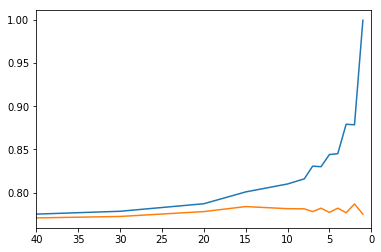

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# Hiermit drehen wir die X-Achse um, sie geht jetzt von 40 bis 1.
plt.xlim(np.max(param_range), 0)

plt.show()

# rechts in Grafik starkes overfitting (extrem hohe Varianz), 
# links underfitting (Bias und zu starke Generalisierung) (zu viele Daten 
# werden angeschaut, Verbesserung, wenn weniger Daten angeschaut werden, optimal hier n = 2)

In [74]:
# Gradient Boosting Regressor Algorithm

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators = 10) 
gbrt.fit(X, y) 
print(gbrt.score(X_test, y_test))

y_pred=gbrt.predict(X_test) 

0.3357249227812362


In [76]:
scores = cross_val_score(GradientBoostingRegressor(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.53708608 0.5366245  0.59021181 0.56073944 0.58785994 0.56378559
 0.55746759 0.56912147 0.56921481 0.55238902 0.56515904 0.5315139
 0.52573177 0.5674043  0.57184108 0.56405507 0.51423746 0.56490661
 0.58379074 0.57323533 0.53310129 0.5718544  0.53851363 0.54519431
 0.60235651 0.55458493 0.59278685 0.5366023  0.5590054  0.57626739
 0.54644055 0.52158786 0.58293584 0.58606731 0.57803313 0.56802182
 0.55496216 0.56465711 0.57323355 0.55241731 0.57439441 0.54659101
 0.55508352 0.54853184 0.5888036  0.5806559  0.56638329 0.58522654
 0.56911738 0.53865877]
0.561568908996814


In [77]:
y_predGBRT = gbrt.predict(predict)

print(y_predGBRT)

SOLD_OUT_FLG = pd.DataFrame(data=y_predGBRT,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pd.options.display.float_format = '{:,.f}'.format
pred_final.to_csv('sold_out_predict.csv',index=False)


print(sum(y_predGBRT))

[0.42150881 0.07581086 0.08616702 ... 0.4926663  0.08680436 0.61286292]
230.56187931870727


In [78]:
# Decision Tree Algorithm

In [79]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = "entropy")
DTC.fit(X, y)

print(DTC.score(X_test, y_test))

y_pred = DTC.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.873218304576144


0.6352519257756506

In [80]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.86491557 0.87523452 0.87054409 0.87804878 0.88356808 0.88461538
 0.86679174 0.87148218 0.88930582 0.85539906 0.85928705 0.8836773
 0.869606   0.87523452 0.857277   0.8564728  0.87148218 0.88930582
 0.88555347 0.8657277  0.87523452 0.86397749 0.88086304 0.88180113
 0.85352113 0.86397749 0.86679174 0.89962477 0.86022514 0.86666667
 0.89118199 0.88086304 0.8630394  0.86772983 0.88450704 0.87429644
 0.85459662 0.89212008 0.85741088 0.87042254 0.8836773  0.87898687
 0.85834897 0.87898687 0.84788732 0.86772983 0.87711069 0.88086304
 0.8836773  0.86197183]
0.8724324005320228


In [81]:
y_predDTC = DTC.predict(predict)

print(y_predDTC)

SOLD_OUT_FLG = pd.DataFrame(data=y_predDTC,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([test['OBS_ID'],SOLD_OUT_FLG],axis =1)
pd.options.display.float_format = '{:,.f}'.format
pred_final.to_csv('sold_out_predict.csv',index=False)


print(sum(y_predDTC))

[1. 0. 0. ... 1. 0. 1.]
232.0
